In [1]:
import numpy as np
import pandas as pd

# 前処理

    機械学習のアルゴリズムを適用する前にデータの特性を理解して前処理を行う
    データ解析の8割から9割をしめる重要な工程
    内容としては以下の3つ
    ・欠損値への対応
    ・カテゴリ変数のエンコーディング
    ・特徴量の正規化

欠損値

    対応方法
    ・欠損値を補完する
    ・欠損値を除去する

In [2]:
#サンプルのデータセット
df = pd.DataFrame({
    'A':[1,np.nan,3,4,5],
    'B':[6,7,8,np.nan,10],
    'C':[11,12,13,14,15]
})
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


In [3]:
#isnull() 欠損値かどうかを確認する
df.isnull()

#欠損値を除去する場合はdropna()を使用する
#dropna() →行を削除
#dropna(axis = 1) →列を削除

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


In [4]:
#欠損値の補完
#方法1
#fillna()を使用

#方法2
#preprocessingのImputerを使用

from sklearn.preprocessing import Imputer
#平均値で欠損値を補完するインスタンスを作成する
imp = Imputer(strategy = "mean",axis = 0)
#欠損値を補完
imp.fit(df)
imp.transform(df) #返却値はnumpy

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

カテゴリ変数のエンコード

In [5]:
df = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':['a','b','a','b','c']
})
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


In [6]:
#方法1
#カテゴリ変数のエンコーディング

#方法2
#One-Hotエンコーディング


In [7]:
from sklearn.preprocessing import LabelEncoder
#ラベルエンコーダのインスタンス生成
le = LabelEncoder()
#ラベルのエンコーディング
le.fit(df["B"])
le.transform(df["B"])


array([0, 1, 0, 1, 2])

In [8]:
#元の値
le.classes_

array(['a', 'b', 'c'], dtype=object)

In [9]:
#One-Hotエンコーディングの方法は2つ
#方法1
#scikit-learnを使用する場合はpreprocessingのOneHotEncoderクラスを使用

#方法2
#pandasを使用する場合はget_dummies関数を使用する


In [10]:
#OneHotEncoderを使用する場合
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#DataFrameコピー
df_ohe = df.copy()

#ラベルエンコーダのインスタンス化
le = LabelEncoder()

#英語のa,b,cを1,2,3に変換
df_ohe['B'] = le.fit_transform(df_ohe['B'])

#One-hotエンコーダのインスタンス化
ohe = OneHotEncoder(categorical_features=[1])
#One-Hotエンコーディング
ohe.fit_transform(df_ohe).toarray()

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

特徴量の正規化

    特徴量の大きさを揃える処理
    ・分散正規化
    　特徴量の平均が0、標準偏差が1になるように変換する処理(標準化)
    ・最小最大正規化
    　特徴量の最小値が0、最大値が1になるように正規化する処理

In [11]:
df = pd.DataFrame({
    'A':[1,2,3,4,5],
    'B':[100,200,300,400,500]
})

df

,A,B
0,1,100
1,2,200
2,3,300
3,4,400
4,5,500


In [12]:
#分散正規化
from sklearn.preprocessing import StandardScaler
#分散正規化のインスタンス生成
stdsc = StandardScaler()

#分散正規化を実行
stdsc.fit(df)
stdsc.transform(df)

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\naohi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

In [13]:
from sklearn.preprocessing import MinMaxScaler
#最小最大正規化のインスタンス生成
mmsc = MinMaxScaler()
#最小最大正規化を実行
mmsc.fit(df)
mmsc.transform(df)

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [0.75, 0.75],
       [1.  , 1.  ]])

分類

    データの「クラス」を予測して分ける
    紹介
    ・サポートベクタ
    ・決定木
    ・ランダムフォレスト

In [15]:
#学習データとテストデータの準備
from sklearn.datasets import load_iris

iris = load_iris()
X,y = iris.data,iris.target

print(X[:5,:])

print(y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


    学習データとテストデータを分けるためにmodel_selectionモジュールのtrain_test_split関数を利用する
    引数test_size→テストデータの割合
    引数random_stateにはシード値を指定
    

In [17]:
from sklearn.model_selection import train_test_split

#学習データとテストデータに分割
#テストデータのサイズ:3割、シード値:123
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


サポートベクタマシン(SVM)

    分類・回帰だけでなく外れ値の検出にも使えるアルゴリズム
    直線や平面で分離できないデータを高次元の空間に写して線形分離をすることで分類を行う
    データ間の近さを定量化するカーネル(高次元の空間でのデータ間の内積を計算する関数に相当する)を導入

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

#X軸Y軸ともに0から1までの一様分布から100点をサンプリング
X0 = np.random.uniform(size=(100,2))

#クラス0のラベルを100個生成
y0 = np.repeat(0,100)

#X軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = np.random.uniform(-1.0,0.0,size=(100,2))

#クラス1のラベルを100個生成
y1 = np.repeat(1,100)

#散布図にプロット
fig,ax = plt.subplots()

ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")

ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.legend()
plt.show()


<Figure size 640x480 with 1 Axes>

In [3]:
from sklearn.svm import SVC

#学習、および決定境界、マージン、サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0,y0,X1,y1,kernel,C,xmin=-1,xmax=1,ymin=-1,ymax=1):
    #サポートベクタマシンのインスタンス化
    svc = SVC(kernel = kernel , C = C)
    
    #学習
    svc.fit(np.vstack((X0,X1)),np.hstack((y0,y1)))
    
    fig,ax = plt.subplots()
    ax.scatter(X0[:,0],X0[:,1],marker="o",label="class 0")
    
    ax.scatter(X1[:,0],X1[:,1],marker="x",label="class 1")
    
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p,
               colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],
               svc.support_vectors_[:, 1],
               s=250, facecolors='none',
              edgecolors='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()

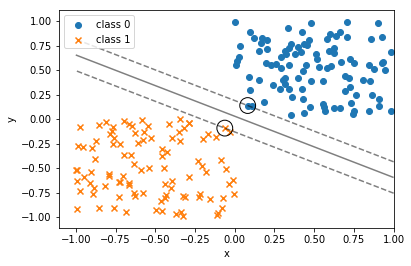

In [4]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

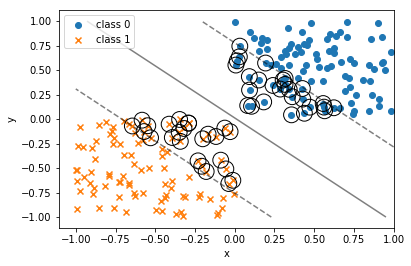

In [5]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)

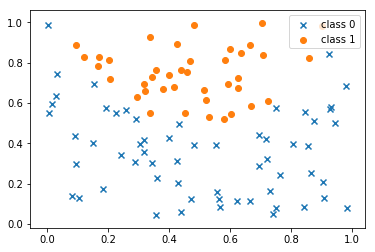

In [7]:
np.random.seed(123)

X = np.random.random(size=(100,2))
y = (X[:,1] > 2*(X[:,0]-0.5)**2+0.5).astype(int)

fig,ax = plt.subplots()
ax.scatter(X[y ==0,0],X[y==0,1],marker="x",label="class 0")

ax.scatter(X[y ==1,0],X[y==1,1],marker="o",label="class 1")
ax.legend()
plt.show()

C:\Users\naohi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


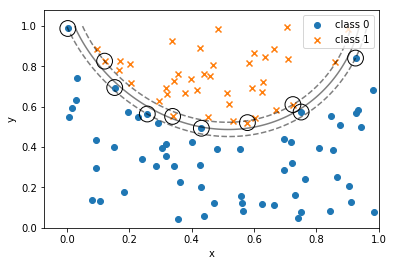

In [9]:
#決定境界、マージン、サポートベクタをプロット
X0,X1 = X[y==0,:],X[y==1,:]
y0,y1 = y[y==0],y[y==1]

plot_boundary_margin_sv(X0,y0,X1,y1,kernel="rbf",C=1e3,xmin=0,ymin=0)

    サポートベクタマシンは外れ値の影響を受けやすいため、正規化が必要

# 決定木

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#データセットの読み込み
iris = load_iris()
X,y = iris.data,iris.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)

#決定木をインスタンス化
tree = DecisionTreeClassifier(max_depth=3)

#学習
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data= export_graphviz(tree, filled=True,
                rounded=True,
                class_names=['Setosa',
                     'Versicolor',
                     'Virigica'],
                feature_names=['Speal Length',
                               'Spal Width',
                               'Petal Length',
                               'Petal Width'],
                out_file=None)
# 決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

In [22]:
#予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])